<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Install Tensorflow
# !pip install -q tensorflow-gpu==2.0.0-beta1
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.0.0


In [0]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [12]:
# load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [13]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [14]:
# build the model
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(32,32,3))(i)
x = BatchNormalization()(x)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1849

In [19]:
# compile and fit
opt = tf.keras.optimizers.Adam(0.1, beta_1=0.99)
model.compile(optiminzer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=30)

Train on 50000 samples, validate on 50000 samples
Epoch 1/30
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.1240 - accuracy: 0.6076 - val_loss: 0.9412 - val_accuracy: 0.6694
Epoch 2/30
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.9048 - accuracy: 0.6909 - val_loss: 0.7008 - val_accuracy: 0.7525
Epoch 3/30
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.7877 - accuracy: 0.7346 - val_loss: 0.5437 - val_accuracy: 0.8125
Epoch 4/30
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.7018 - accuracy: 0.7641 - val_loss: 0.5065 - val_accuracy: 0.8348
Epoch 5/30
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.6254 - accuracy: 0.7887 - val_loss: 0.4459 - val_accuracy: 0.8550
Epoch 6/30
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.5662 - accuracy: 0.8115 - val_loss: 0.3604 - val_accuracy: 0.8889
Epoch 7/30
50000/50000 [==============================] 

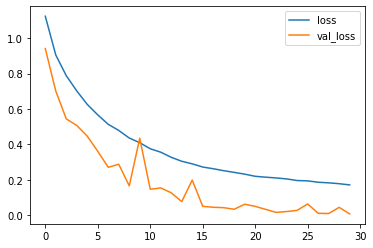

In [20]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

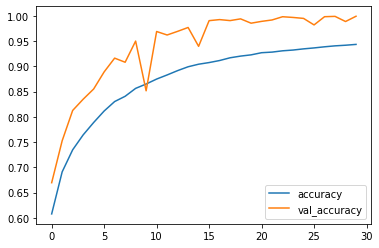

In [21]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()

Confusion matrix, without normalization
[[838  10  31  14   7   3  12  11  44  30]
 [ 12 912   2   8   1   1   5   1   9  49]
 [ 54   5 659  52  64  64  78  12   8   4]
 [ 17  10  32 621  48 167  68  21  10   6]
 [  8   5  39  50 762  28  55  45   6   2]
 [  7   1  14 144  32 748  26  26   1   1]
 [  4   5  15  43  15  17 893   3   2   3]
 [ 12   3  21  30  35  56   5 833   1   4]
 [ 42  32   5  11   4   4   7   2 878  15]
 [ 16  63   5  10   4   3   2   8   8 881]]


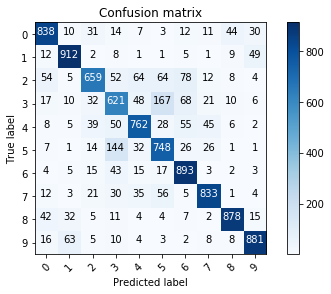

In [22]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: cat Predicted: dog')

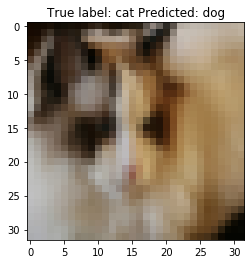

In [45]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))